In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

**Data Overview**

This json file from kaggle contains lists of json objects with data on individuals including:
- customer_id
- age
- gender
- annual_income (k$)
- spending_score (1-100)

Converted from csv to json using: https://csvjson.com/csv2json

In [5]:
df = pd.read_json('mall_customers.json')

In [6]:
df.head()

,Age,Annual_Income,CustomerID,Gender,Spending_Score
0,19,15,1,Male,39
1,21,15,2,Male,81
2,20,16,3,Female,6
3,23,16,4,Female,77
4,31,17,5,Female,40


In [8]:
average_income = df['Annual_Income'].mean()

In [12]:
average_income

60.56

In [13]:
#Add new column for incomes above average, which will be a boolean value

df['above_average_income'] = (df['Annual_Income'] - average_income) > 0

In [17]:
#You can review just 1 or more sample of the data to see how it looks

df.sample(5)

,Age,Annual_Income,CustomerID,Gender,Spending_Score,above_average_income
109,66,63,110,Male,48,True
193,38,113,194,Female,91,True
120,27,67,121,Male,56,True
37,30,34,38,Female,73,False
185,30,99,186,Male,97,True


In [20]:
df.to_csv('mall_customers_processed.csv', index=False)

In [21]:
#Using min and max to get the range

min_income_value = df['Annual_Income'].min()

In [22]:
min_income_value

15

In [23]:
max_income_value = df['Annual_Income'].max()

In [25]:
income_range = max_income_value - min_income_value

In [26]:
income_range

122

In [28]:
#Sorting data

income = df['Annual_Income']

In [30]:
income.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [33]:
sorted_income = income.sort_values().reset_index(drop=True)

In [36]:
sorted_income.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [38]:
income_mean = income.mean()
income_mean

60.56

In [40]:
income_median = income.median()
income_median

61.5

In [43]:
#visualize this data using a histogram

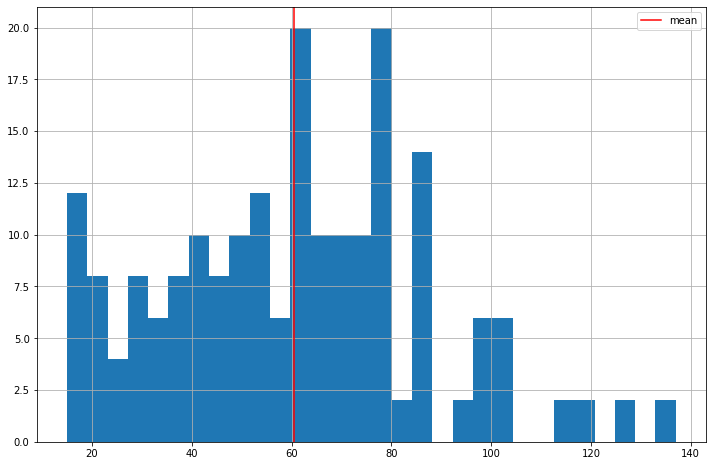

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

df['Annual_Income'].hist(bins=30)

plt.axvline(income_mean, color='r', label='mean')

plt.legend()